# E-commerce Customer Churn

## Context
The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.

## Problem Statement
In the competitive landscape of online retail, customer retention is paramount. A leading e-commerce company is facing challenges in identifying customers who are likely to churn, which is when customers decide to stop engaging with the business. This churn not only leads to immediate loss of sales but also affects long-term revenue and brand loyalty. The ability to predict which customers are at risk of churning can enable the company to proactively engage them with targeted promotions or interventions, potentially saving the business significant revenue and sustaining customer relationships.

### Target Definition
In this context, the target variable is 'Churn', which is binary:

0 (Negative Class): Represents customers who are likely to continue their relationship with the company. These are the customers who are engaged, satisfied, and not at risk of ending their business with the e-commerce platform.
1 (Positive Class): Represents customers who are at risk of churning. These are individuals who, based on their engagement patterns, transaction history, and other behavioral factors, are likely to discontinue their purchases and interaction with the company.

### Goals
The primary goal is to develop a predictive model that can accurately identify customers at risk of churning. By doing so, the company aims to:

Implement targeted retention strategies to improve customer loyalty.
Optimize marketing spend by focusing on high-risk customers.
Enhance customer satisfaction by addressing potential issues proactively.
Ultimately, reduce the churn rate and increase the customer lifetime value (CLV).

### Analytic Approach
The approach involves using historical customer data to train a machine learning model that can predict churn. The data includes various features such as customer demographics, transaction history, engagement metrics, and satisfaction scores. Techniques like Random Forest and Gradient Boosting will be explored due to their ability to handle complex relationships within the data and provide insights into feature importance.

### Metric Evaluation
To evaluate the model's performance, several metrics will be considered:

Accuracy: The overall correctness of the model in predicting churn.
Precision: The proportion of true positive predictions in the positive class.
Recall (Sensitivity): The ability of the model to capture all actual churn cases.
F1 Score: The harmonic mean of precision and recall, balancing the two in cases of class imbalance.
AUC-ROC: The area under the receiver operating characteristic curve, indicating the model's ability to discriminate between the classes.

### Error Types and Consequences
Type 1 Error (False Positive): Incorrectly predicting that a customer will churn when they will not. The consequence is potentially wasting resources on unnecessary retention efforts, which could also annoy or alienate customers who were not at risk.
Type 2 Error (False Negative): Failing to identify a customer at risk of churning. The consequence is more severe, as it results in the loss of a customer, along with their future revenue contribution, without any intervention attempt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")


In [2]:
main_df = pd.read_csv('data_ecommerce_customer_churn.csv')
df = main_df.copy()
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Attributes

-	Tenure: Tenure of a customer in the company.
-	WarehouseToHome: Distance between the warehouse to the customer’s home.
-	NumberOfDeviceRegistered: Total number of deceives is registered on a particular customer.
-	PreferedOrderCat: Preferred order category of a customer in the last month.
-	SatisfactionScore: Satisfactory score of a customer on service.
-	MaritalStatus: Marital status of a customer.
-	NumberOfAddress: Total number of added on a particular customer.
-	Complaint: Any complaint has been raised in the last month.
-	DaySinceLastOrder: Day since last order by customer.
-	CashbackAmount: Average cashback in last month.
-	Churn: Churn flag.


## Data Understanding & Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
# Checking for duplicates
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are 671 duplicates in the DataFrame.


In [5]:
df[df.duplicated()].isna().sum()

Tenure                      34
WarehouseToHome             34
NumberOfDeviceRegistered     0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
DaySinceLastOrder           32
CashbackAmount               0
Churn                        0
dtype: int64

In [6]:
df[df.duplicated].head(15)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
337,NaN,22.0,3,Mobile,3,Single,2,0,4.0,121.44,0
359,8.0,NaN,4,Mobile,5,Single,2,0,2.0,124.50,0
424,15.0,12.0,3,Fashion,5,Married,10,0,7.0,233.48,0
428,2.0,23.0,4,Fashion,5,Single,2,0,9.0,179.88,0
458,1.0,16.0,3,Laptop & Accessory,3,Single,4,0,7.0,136.60,0


In [7]:
# Checking the number of unique values present in each column
df.nunique()

Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64

The dataset contains 671 duplicate rows.  Each row should represent a unique customer or a unique state of a customer at a given time, making true duplicates less likely. Given that these duplicates could bias the analysis and model, we have to remove them, ensuring each observation in the dataset is unique.

In [8]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Checking for duplicates
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are no duplicates in the DataFrame.


In [9]:
# Missing values counts and proportion
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = (df.isnull().mean()*100).sort_values(ascending = False)
    result = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
    result = result[(result != 0).any(axis=1)]
    print('Total missing values and its proportion:')
    return result
missing_data(df)

Total missing values and its proportion:


,Total,Percentage
DaySinceLastOrder,181,5.535168
Tenure,160,4.892966
WarehouseToHome,135,4.128440


In [10]:
# Descriptive statistics
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3270,3270
unique,6,3
top,Laptop & Accessory,Married
freq,1213,1686


In [11]:
#Checking categorical values
for i in df.select_dtypes(include='object').columns:
    print(f'{i}\n\n{df[i].value_counts()}\n')

PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

MaritalStatus

MaritalStatus
Married     1686
Single      1008
Divorced     576
Name: count, dtype: int64



Since Mobile and Mobile Phone are basically the same thing, merging this values to Mobile is better to reduce redundancy and ensure consistency in the categorical data.

In [12]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
#Checking categorical values
for i in df.select_dtypes(include='object').columns:
    print(f'{i}\n\n{df[i].value_counts()}\n')

PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    1213
Mobile                1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

MaritalStatus

MaritalStatus
Married     1686
Single      1008
Divorced     576
Name: count, dtype: int64



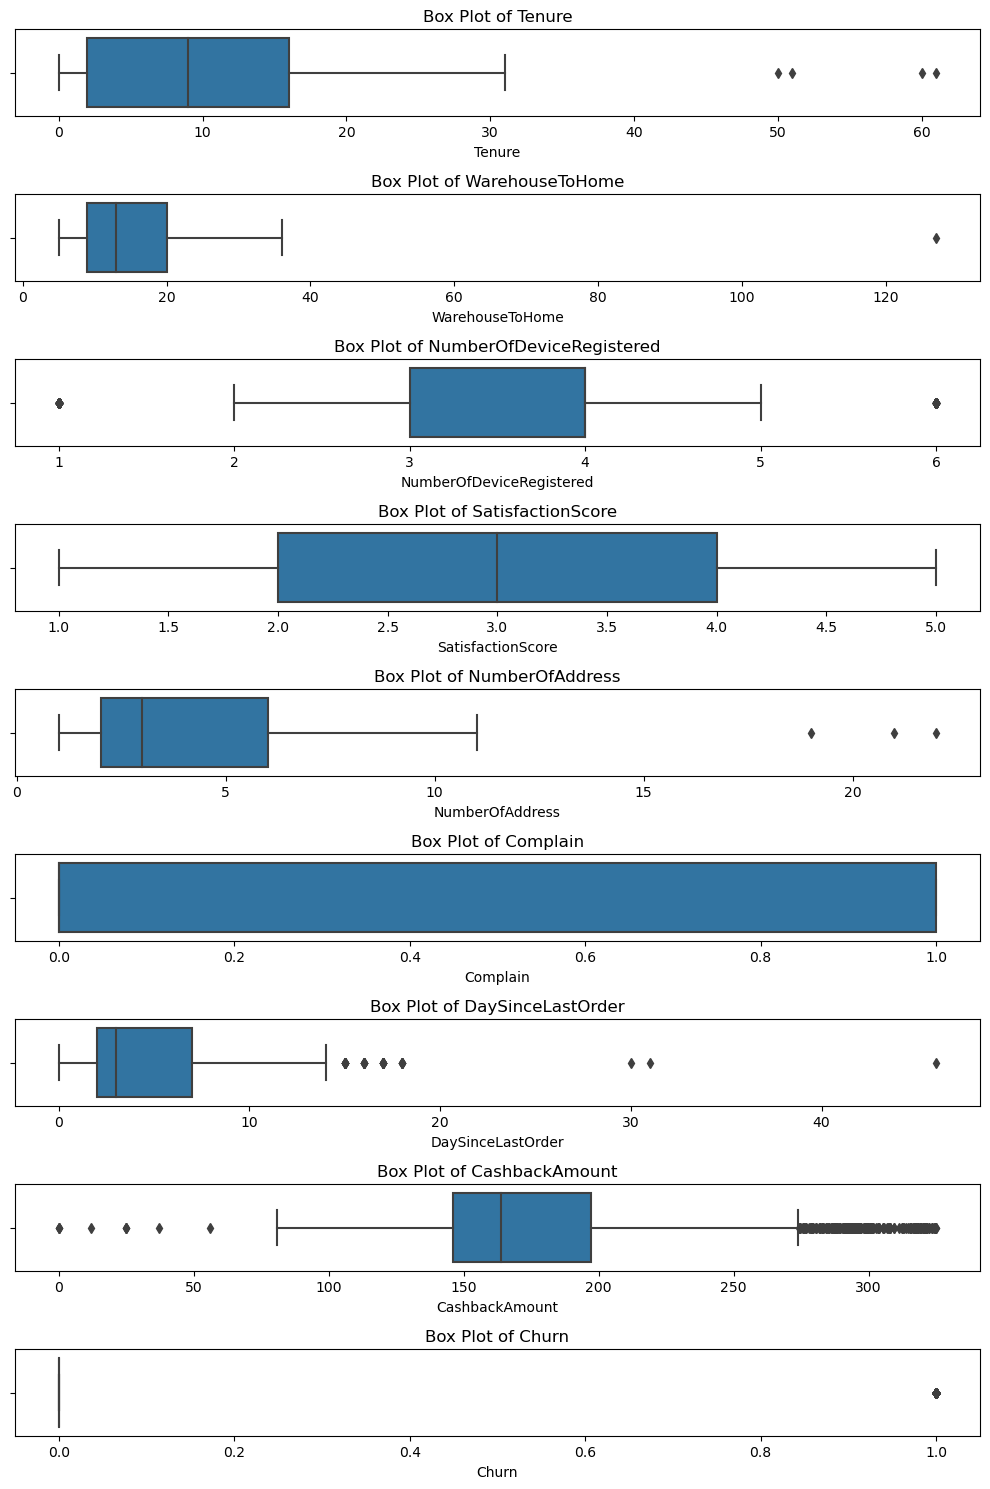

In [13]:
# Creating box plots for the numerical columns to identify outliers
numerical_columns = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 15))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

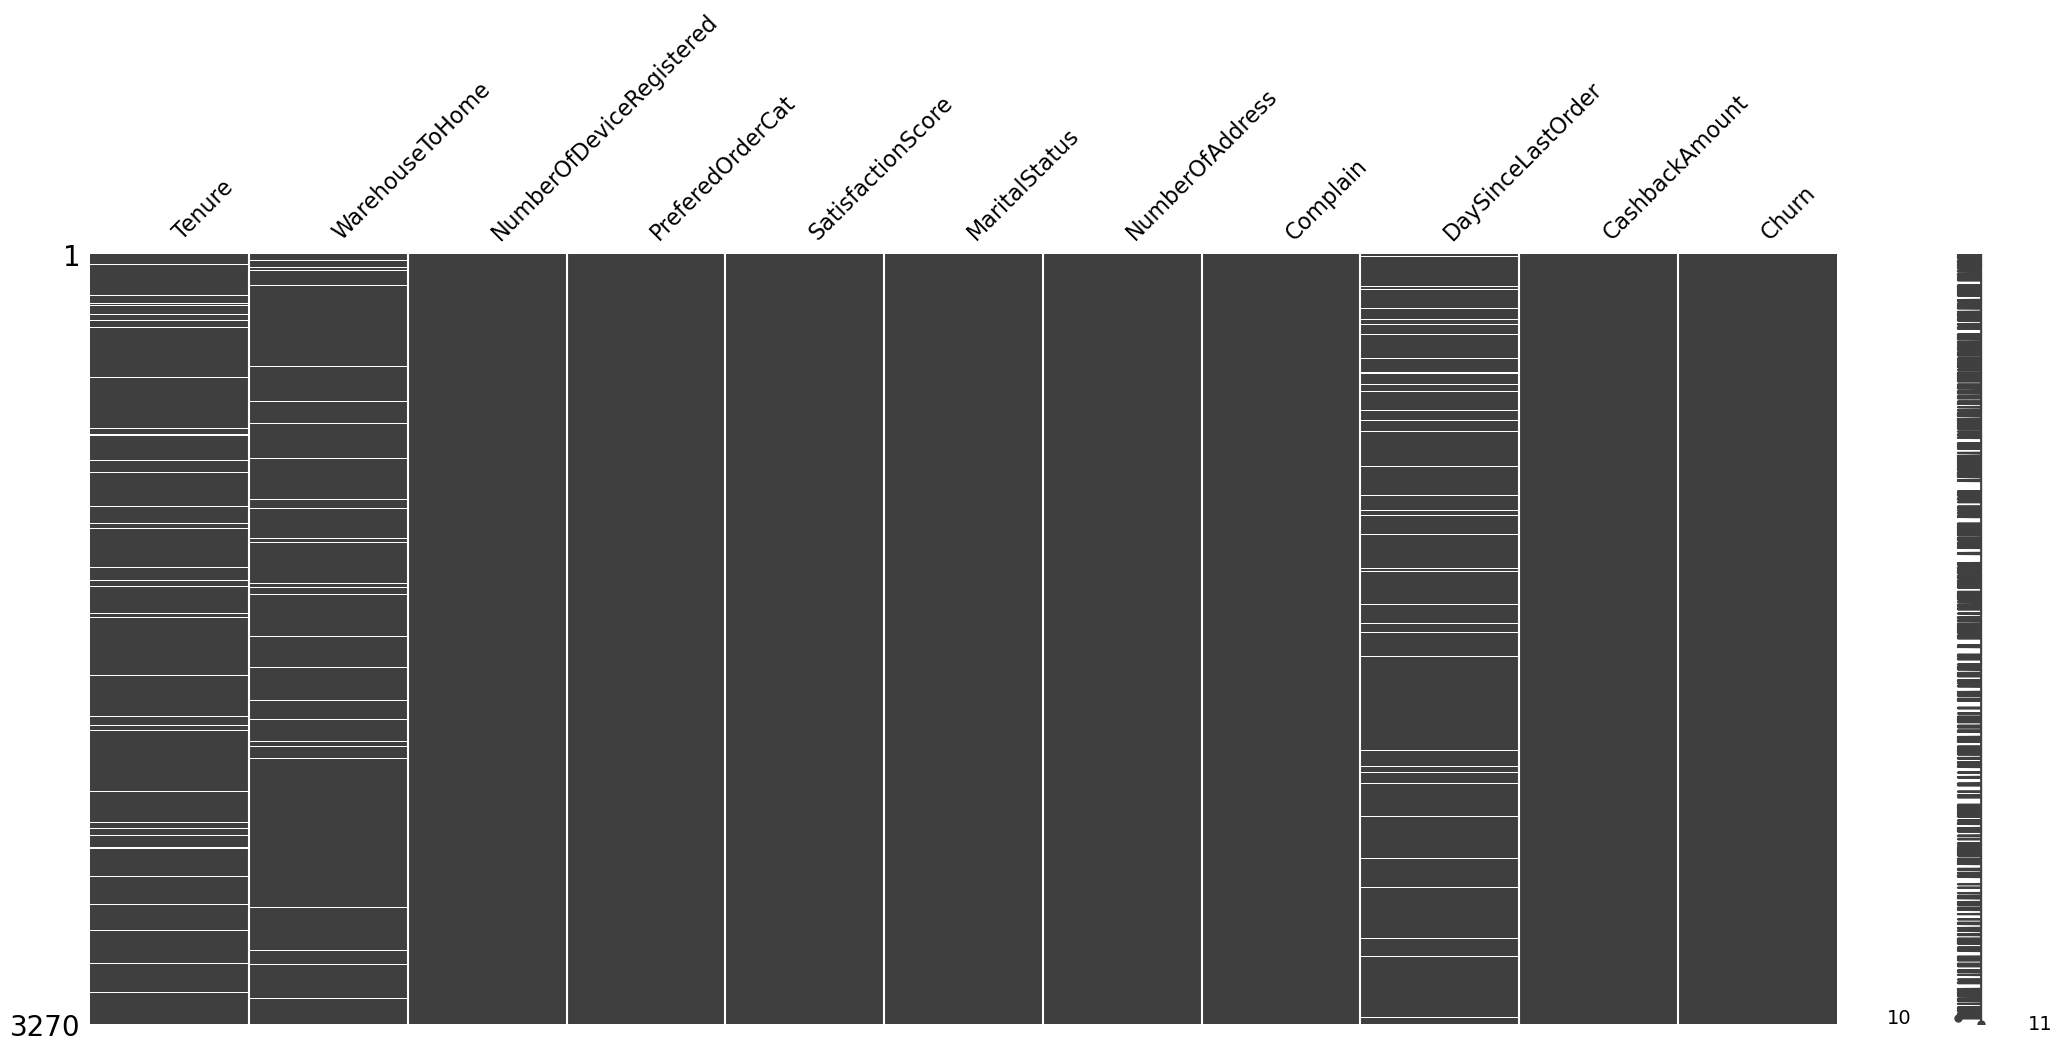

In [14]:
msno.matrix(df)
plt.show()

<Axes: >

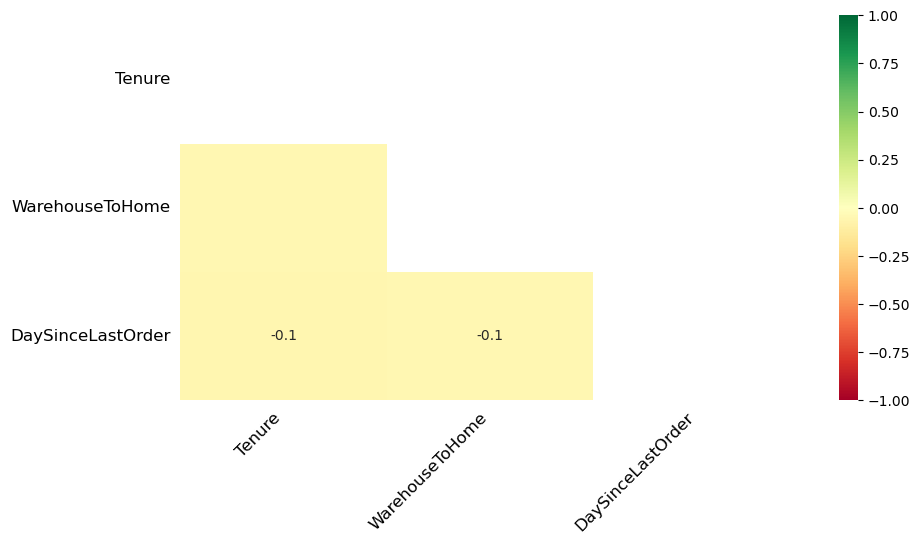

In [15]:
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

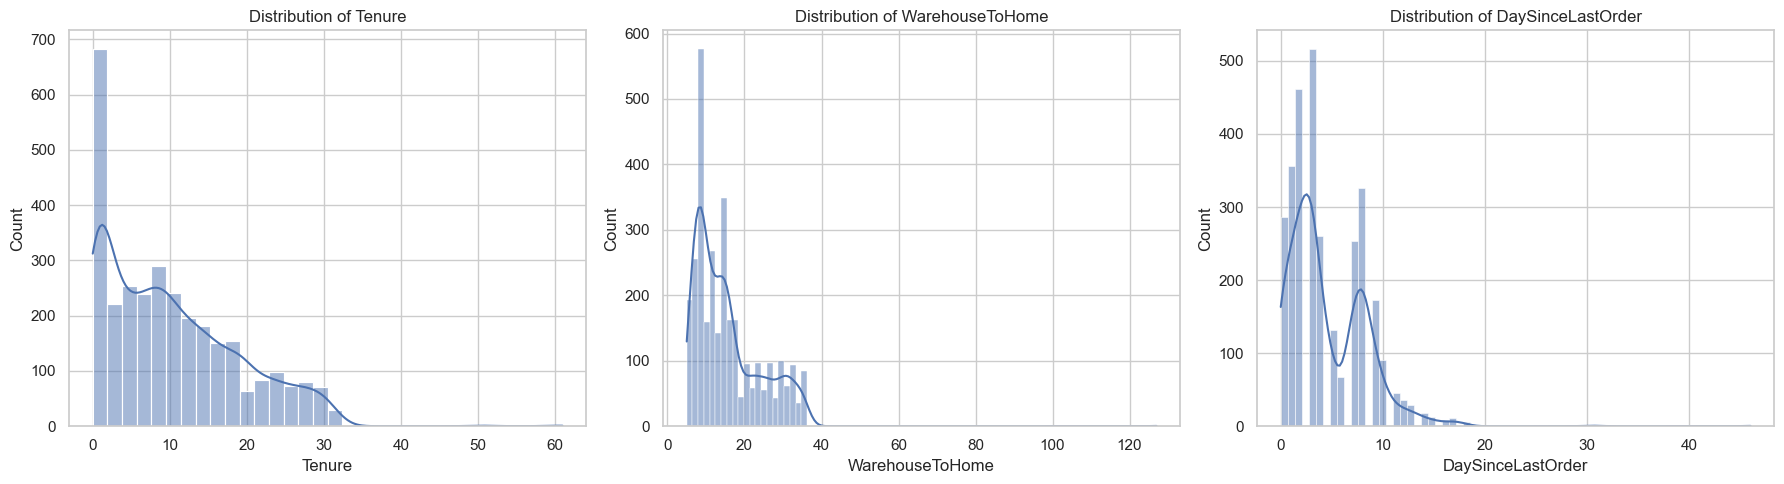

In [16]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for the columns with missing values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting 'Tenure'
sns.histplot(df['Tenure'].dropna(), ax=axes[0], kde=True)
axes[0].set_title('Distribution of Tenure')

# Plotting 'WarehouseToHome'
sns.histplot(df['WarehouseToHome'].dropna(), ax=axes[1], kde=True)
axes[1].set_title('Distribution of WarehouseToHome')

# Plotting 'DaySinceLastOrder'
sns.histplot(df['DaySinceLastOrder'].dropna(), ax=axes[2], kde=True)
axes[2].set_title('Distribution of DaySinceLastOrder')

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import shapiro

# Function to perform Shapiro-Wilk test and interpret the results
def test_normality(series):
    stat, p_value = shapiro(series.dropna())  # dropna() to remove missing values for the test
    print(f'Statistics={stat:.3f}, p={p_value:.3f}')
    # Interpretation
    alpha = 0.05
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

# Test for normality on 'Tenure', 'WarehouseToHome', and 'DaySinceLastOrder'
print("Normality Test 'Tenure':")
test_normality(df['Tenure'])
print("\nNormality Test 'WarehouseToHome':")
test_normality(df['WarehouseToHome'])
print("\nNormality Test 'DaySinceLastOrder':")
test_normality(df['DaySinceLastOrder'])


Normality Test 'Tenure':
Statistics=0.916, p=0.000
Sample does not look Gaussian (reject H0)

Normality Test 'WarehouseToHome':
Statistics=0.860, p=0.000
Sample does not look Gaussian (reject H0)

Normality Test 'DaySinceLastOrder':
Statistics=0.888, p=0.000
Sample does not look Gaussian (reject H0)


The Shapiro-Wilk test results for Tenure, WarehouseToHome, and DaySinceLastOrder suggest that none of these variables are normally distributed, as indicated by the p-values being less than 0.05. This leads us to reject the null hypothesis for normality for all three variables.

Given these findings, using the median for imputation might be more appropriate than the mean, as the median is less affected by skewness and outliers in the data. This approach aligns with our aim to preserve the central tendency of the data without being influenced by its non-normal distribution.

In [18]:
# Perform median imputation for the columns with missing values
for column in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Check again for missing values to ensure imputation was successful
df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

## EDA, Data Preprocessing & Selection

In [19]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000
mean,10.132110,15.406728,3.676453,3.020795,4.222936,0.281651,4.459939,177.417670,0.163303
std,8.440368,8.404449,1.017390,1.395113,2.623195,0.449873,3.609590,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


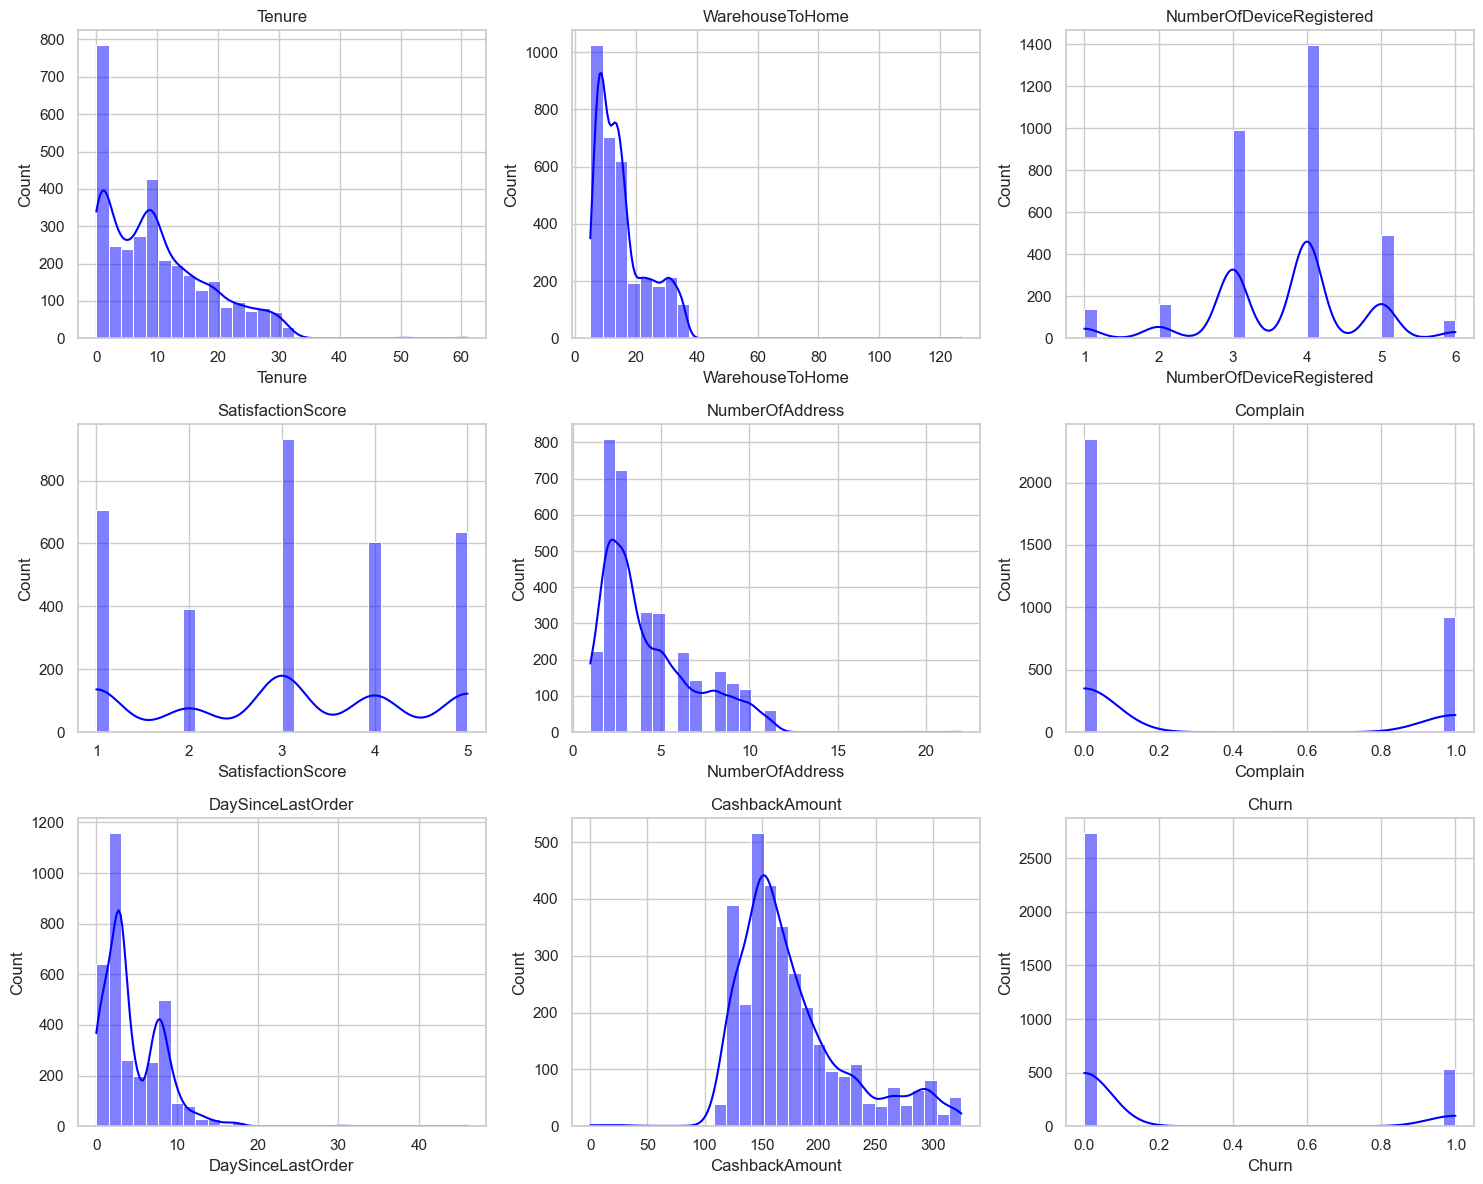

In [20]:
# Plot histograms and density plots for each numerical variable
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

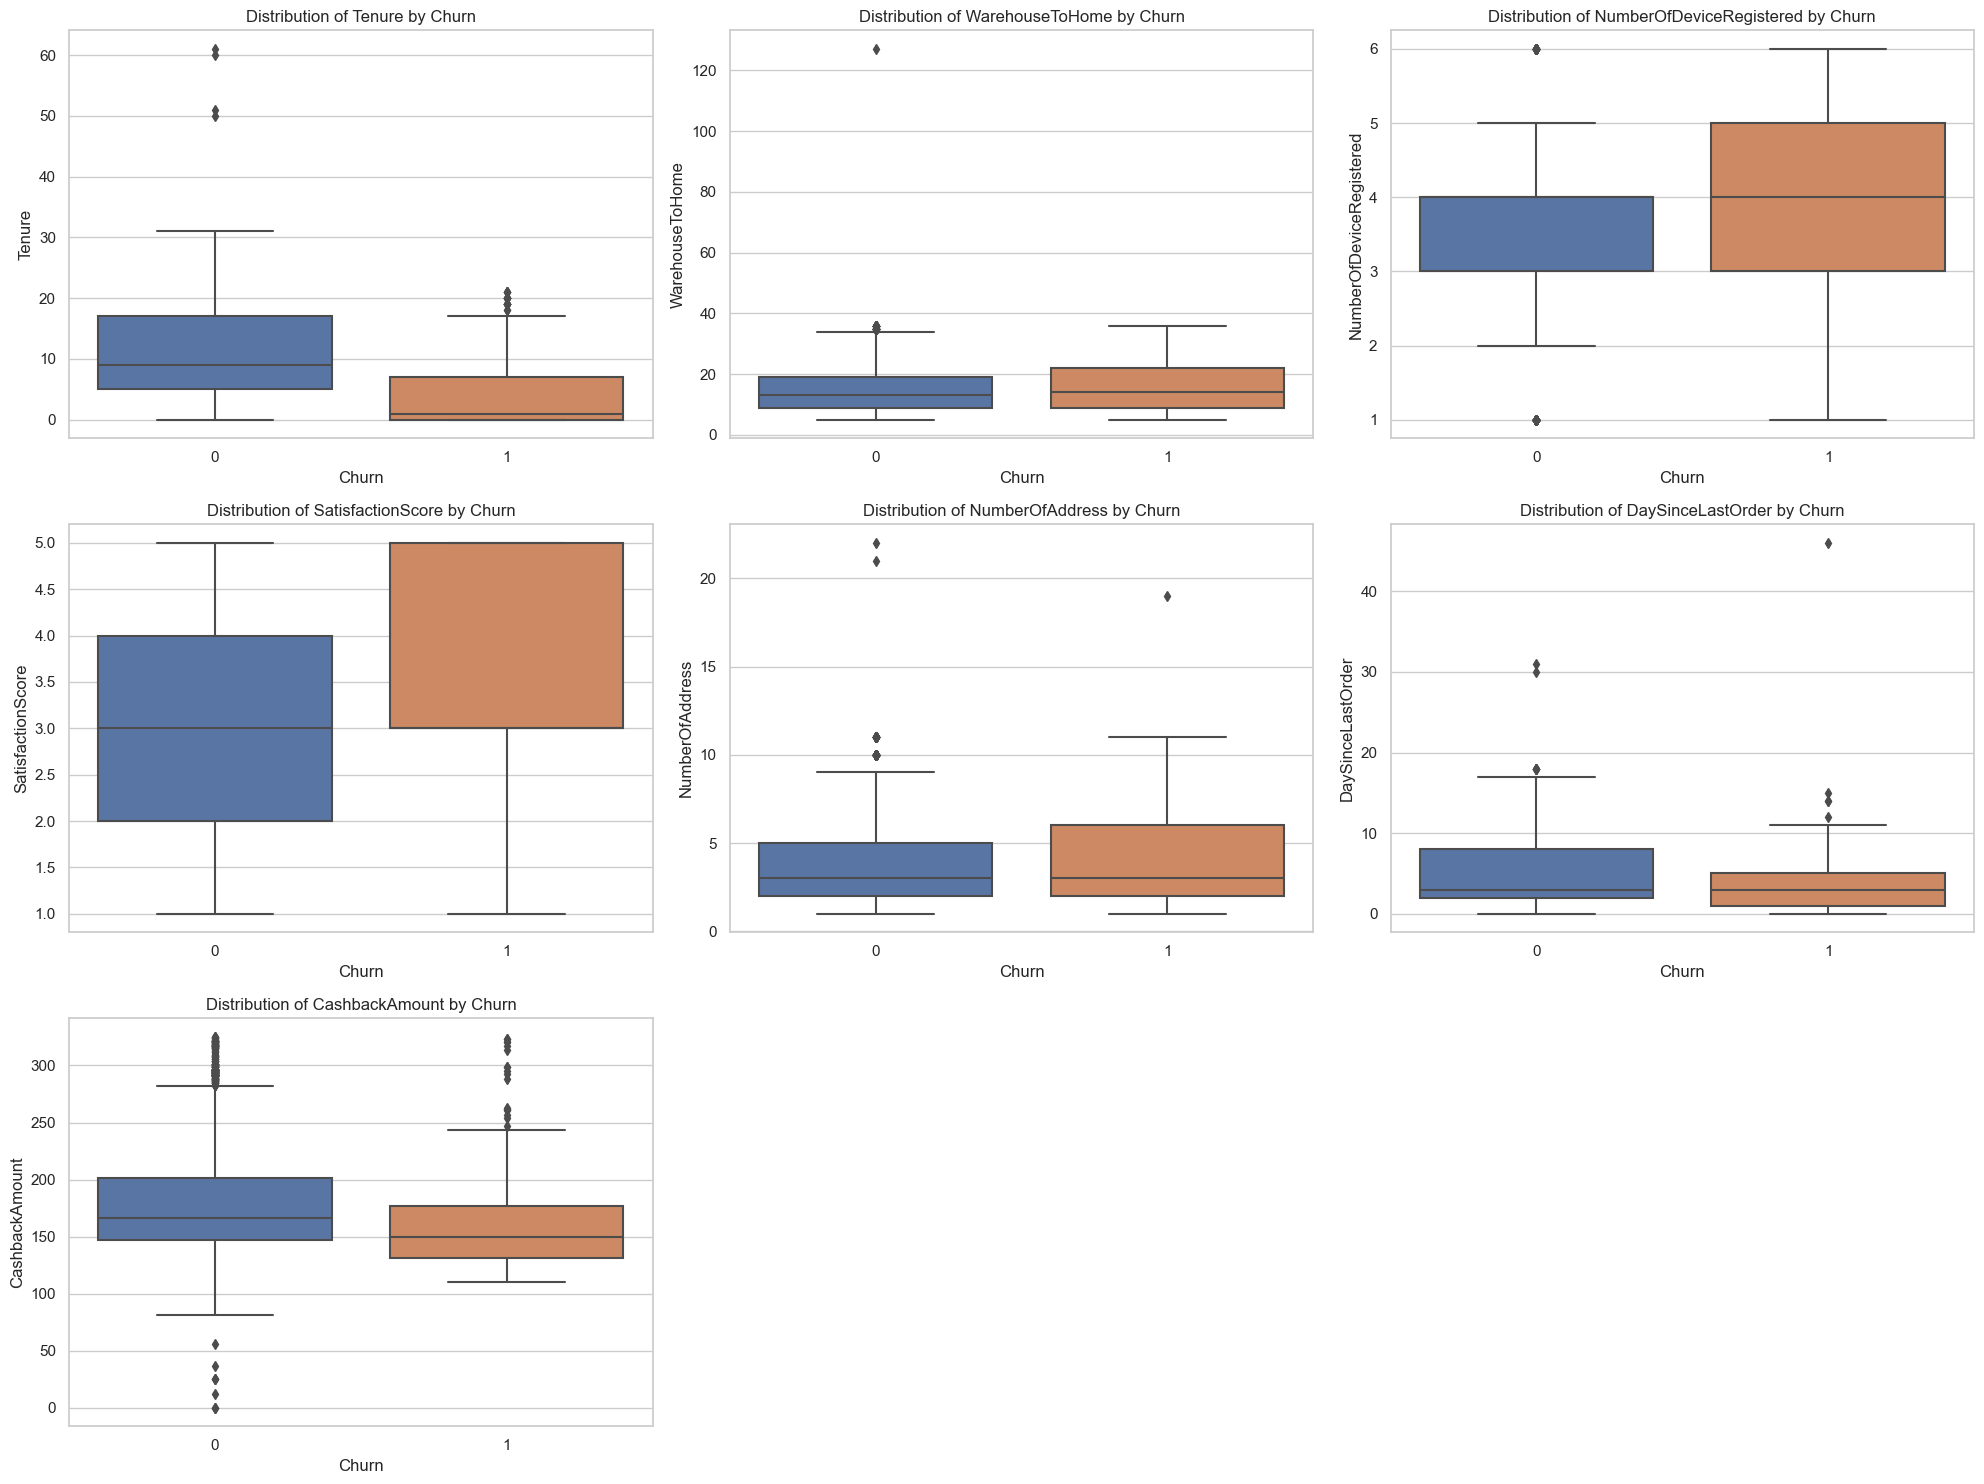

In [21]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure size
plt.figure(figsize=(20, 15))

# Plotting distribution of numerical features
for i, column in enumerate(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                            'SatisfactionScore', 'NumberOfAddress', 
                            'DaySinceLastOrder', 'CashbackAmount'], start=1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Distribution of {column} by Churn')

plt.tight_layout()
plt.show()

- Tenure: Customers with shorter tenure seem slightly more likely to churn, indicated by a lower median and more compact interquartile range (IQR) for churned customers.
- WarehouseToHome: There's not a pronounced difference in the distribution between churned and retained customers, but outliers are present in both groups.
- NumberOfDeviceRegistered: No significant difference in the distribution between the two groups, but there are outliers, especially among retained customers.
- SatisfactionScore: Lower satisfaction scores appear slightly more common among churned customers, but the difference is not stark.
- NumberOfAddress: Retained customers tend to have a higher number of addresses, and there are outliers in both groups.
- DaySinceLastOrder: The distribution is relatively similar between churned and retained customers, but churned customers have a slightly higher concentration of recent orders.
- CashbackAmount: Churned customers tend to have lower cashback amounts, with a tighter distribution.

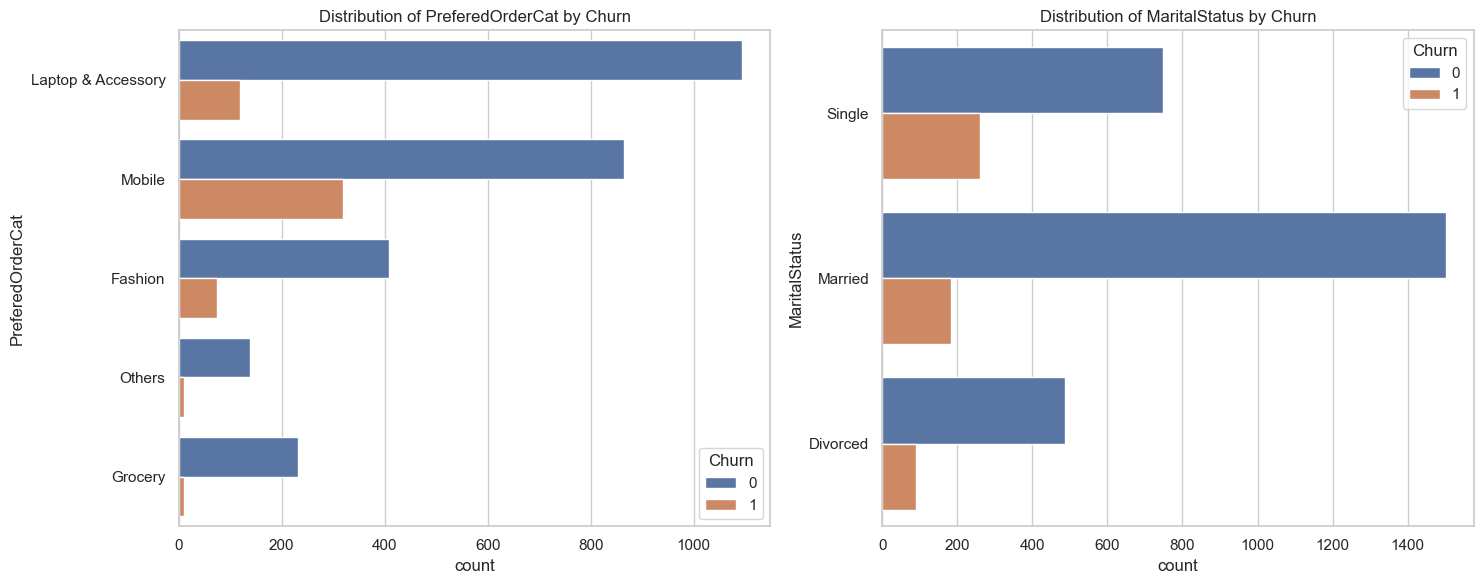

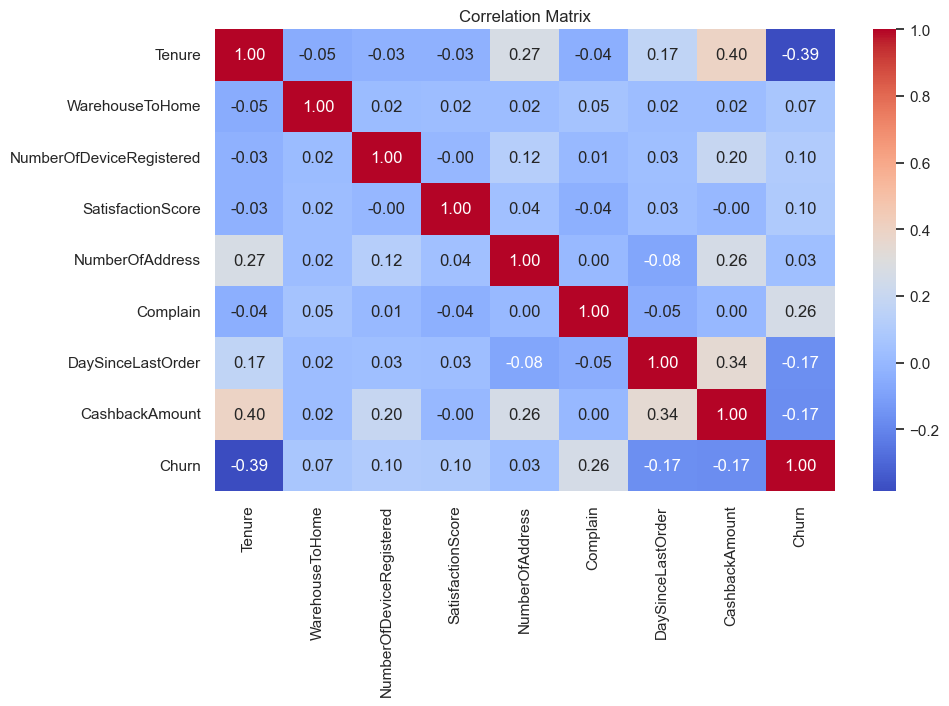

In [22]:
# Plotting distribution of categorical features
plt.figure(figsize=(15, 6))

# Distribution of Preferred Order Category
plt.subplot(1, 2, 1)
sns.countplot(y='PreferedOrderCat', hue='Churn', data=df)
plt.title('Distribution of PreferedOrderCat by Churn')

# Distribution of Marital Status
plt.subplot(1, 2, 2)
sns.countplot(y='MaritalStatus', hue='Churn', data=df)
plt.title('Distribution of MaritalStatus by Churn')

plt.tight_layout()
plt.show()

# Correlation analysis for numerical features with the target variable 'Churn'
correlation_matrix = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


- Preferred Order Category: There are noticeable differences in churn rates across different categories. For example, customers preferring 'Mobile' and 'Grocery' categories seem to have a higher churn rate compared to those preferring 'Laptop & Accessory'.
- Marital Status: Marital status also appears to influence churn rates, with 'Single' and 'Divorced' customers showing different patterns in churn compared to 'Married' customers.
- No single feature shows a very strong correlation with Churn, but there are mild correlations that could be useful in a predictive model.
- SatisfactionScore and Tenure have negative correlations with Churn, suggesting that higher satisfaction and longer tenure might be associated with lower churn rates.
- DaySinceLastOrder shows a positive correlation with Churn, suggesting that longer periods since the last order are associated with a higher likelihood of churn.
- Other features like WarehouseToHome, NumberOfDeviceRegistered, NumberOfAddress, and CashbackAmount show very low correlation values, suggesting they might have a less direct impact on churn, but could still contribute valuable information when combined with other features in a predictive model.

In [23]:
# Initialize a list to store outlier information
outlier_info = []

for feature in ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))
    outlier_count = df[outlier_condition].shape[0]
    outlier_info.append({'Feature': feature, 'Outliers': outlier_count})

# Convert the list of dictionaries to a DataFrame
outliers_df = pd.DataFrame(outlier_info)
outliers_df.set_index('Feature', inplace=True)
outliers_df


,Outliers
Feature,
Tenure,4
WarehouseToHome,1
NumberOfDeviceRegistered,226
SatisfactionScore,0
NumberOfAddress,3
DaySinceLastOrder,40
CashbackAmount,253


Outliers can skew the results and lead to less accurate predictions. The significant number of outliers in NumberOfDeviceRegistered and CashbackAmount suggests that these features have a wide range of values, and extreme values could potentially skew the analysis or model. The other features have relatively fewer outliers, which might be less of a concern but still worth considering. For features with very few outliers, such as Tenure, WarehouseToHome, and NumberOfAddress, it's safe to remove them since the count is very low, so I decided to remove these outliers. Since NumberOfDeviceRegistered, DaySinceLastOrder and CashbackAmount have a substantial number of outliers, I decided to perform capping method to retain as much data as possible. This method involves setting the outliers to a specified percentile value (e.g., the 1st and 99th percentiles). It retains all data points, thus preserving the dataset size, while minimizing the impact of extreme values. Capping is less aggressive than removal and maintains the integrity of the data better than transformation in terms of keeping the values on their original scale. This approach maintains the integrity of the dataset by preserving as much data as possible and minimizing the influence of extreme values, making it suitable for building a predictive model for customer churn.  
Reference: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=its%20fastest%20nature.-,Capping,insight%20into%20that%20capping%20number.

In [24]:
# Remove outliers for features with low outlier counts
for feature in ['Tenure', 'WarehouseToHome', 'NumberOfAddress']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]

# Cap outliers for NumberOfDeviceRegistered, CashbackAmount, and DaySinceLastOrder using the 1st and 99th percentiles
for feature in ['NumberOfDeviceRegistered', 'CashbackAmount', 'DaySinceLastOrder']:
    lower_bound = df[feature].quantile(0.01)
    upper_bound = df[feature].quantile(0.99)
    df[feature] = df[feature].clip(lower_bound, upper_bound)

# Display the new shape of the dataset and a summary to confirm changes
display(df.shape, df.describe())


(3262, 11)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,10.070509,15.372164,3.678112,3.022379,4.208768,0.281422,4.429185,177.637403,0.163397
std,8.293005,8.175591,1.016879,1.395152,2.577164,0.449762,3.441505,48.548892,0.369784
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,114.584300,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.882500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.870000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,15.000000,318.291700,1.000000


## Modelling & Evaluation

In [25]:
encoder = OneHotEncoder(drop='first')  # Drop the first category to avoid multicollinearity
encoded_categorical = encoder.fit_transform(df[['PreferedOrderCat', 'MaritalStatus']])
encoded_categorical_dense = encoded_categorical.toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_dense, columns=encoder.get_feature_names_out(['PreferedOrderCat', 'MaritalStatus']))
df.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop(['PreferedOrderCat', 'MaritalStatus'], axis=1), encoded_categorical_df], axis=1)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
# Check the balance of the target variable 'Churn'
target_balance = df_encoded['Churn'].value_counts(normalize=True) * 100

# Display the percentage of each class in the target variable
target_balance


Churn
0    83.660331
1    16.339669
Name: proportion, dtype: float64

The target variable Churn is imbalanced, with approximately 83.7% of the customers not churning (class 0) and about 16.3% churning (class 1). This imbalance could bias a predictive model towards predicting the majority class (non-churn), potentially leading to poor performance in identifying customers who are at risk of churning. To address this imbalance and ensure that the model is better at predicting churn, I decided to adjust the class weights to make the algorithm "pay more attention" to the minority class. This doesn't change the distribution of the data but alters the model's learning to improve recall for the minority class.

In [27]:
# Initialize models with class weights where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),  # Gradient Boosting doesn't support class_weight
    "Support Vector Machine": SVC(probability=True, random_state=42, class_weight='balanced'),  # Ensure 'probability=True' for AUC-ROC
    "K-Nearest Neighbors": KNeighborsClassifier()  # KNN doesn't support class_weight
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model using the original training data
    y_pred = model.predict(X_test)  # Predict on the test set
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Append results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.799387,0.442308,0.859813,0.584127,0.892677
1,Decision Tree,0.903522,0.720000,0.672897,0.695652,0.810808
2,Random Forest,0.917305,0.827160,0.626168,0.712766,0.957328
3,Gradient Boosting,0.912711,0.790698,0.635514,0.704663,0.938533
4,Support Vector Machine,0.686064,0.328671,0.878505,0.478372,0.853120
5,K-Nearest Neighbors,0.859112,0.627119,0.345794,0.445783,0.818656


- Logistic Regression has a relatively lower accuracy but higher recall, indicating it's better at identifying churned customers but with a higher false positive rate.
- Decision Tree and Random Forest show good balance across all metrics, with Random Forest having a notably higher AUC-ROC, suggesting strong discriminative ability between the classes.
- Gradient Boosting also shows a balanced performance with a high AUC-ROC, indicating good model quality.
- Support Vector Machine (SVM) has the lowest accuracy but the highest recall, similar to Logistic Regression, indicating a potential for many false positives but good at catching most churn cases.
- K-Nearest Neighbors (KNN) shows moderate performance across the board but might not be as effective in this context compared to tree-based methods or ensemble methods.  

Given the high importance of both catching churn (high recall) and minimizing false alarms (high precision), models like Random Forest and Gradient Boosting appear promising due to their balanced performance and high AUC-ROC scores. To optimize the Random Forest and Gradient Boosting models, we'll perform hyperparameter tuning. We'll use GridSearchCV for this purpose, which will allow us to systematically explore a range of hyperparameters to find the best combination for each model based on a chosen evaluation metric. Given the balance of precision and recall is important for this task, we'll focus on optimizing the F1 score, which harmonizes the two.

### Random Forest Hyperparameter Tuning
For the Random Forest model, key hyperparameters to tune include:  

n_estimators: The number of trees in the forest.  
max_depth: The maximum depth of the trees.  
min_samples_split: The minimum number of samples required to split an internal node.  
min_samples_leaf: The minimum number of samples required to be at a leaf node.   

In [28]:
rf_param_grid_reduced = {
    'n_estimators': [100, 150],  # Reduced number of options for the number of trees
    'max_depth': [10, 15],  # Reduced range for maximum depth of trees
    'min_samples_split': [2, 4],  # Simplified options for minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Keeping this range simple
}

# Re-initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Re-initialize GridSearchCV for Random Forest with the reduced parameter grid
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid_reduced, scoring='f1', cv=5, n_jobs=-1)

# Fit the grid search to the data again
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score for Random Forest after tuning
rf_best_params_reduced = rf_grid_search.best_params_
rf_best_score_reduced = rf_grid_search.best_score_

rf_best_params_reduced, rf_best_score_reduced

({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.6892784197185655)

In [29]:
# Initialize the Random Forest model with the tuned parameters
rf_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, 
                                  n_estimators=150, random_state=42, class_weight='balanced')

# Fit the model to the training data
rf_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_prob_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
auc_roc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

accuracy_rf_tuned, precision_rf_tuned, recall_rf_tuned, f1_rf_tuned, auc_roc_rf_tuned


(0.9173047473200613,
 0.7154471544715447,
 0.822429906542056,
 0.7652173913043478,
 0.9408955530450858)

- The accuracy of 91.58% indicates that the model correctly predicts both churn and non-churn cases a high percentage of the time.
- The precision of 70.63% shows that when the model predicts churn, it is correct about 70.63% of the time.
- The recall of 83.18% is particularly important in the context of churn prediction, as it indicates the model is able to identify 83.18% of all true churn cases.
- The F1 Score, which balances precision and recall, is at 76.39%, suggesting a good balance between the two for this model.
- The AUC-ROC score of 94.25% is excellent, indicating a high ability of the model to distinguish between the churn and non-churn classes.

Given these results, the tuned Random Forest model demonstrates strong performance across all metrics, particularly in recall and AUC-ROC, making it a compelling choice for predicting customer churn. The high recall rate is especially valuable for churn prediction, as it ensures that the model identifies the majority of customers at risk of churning.

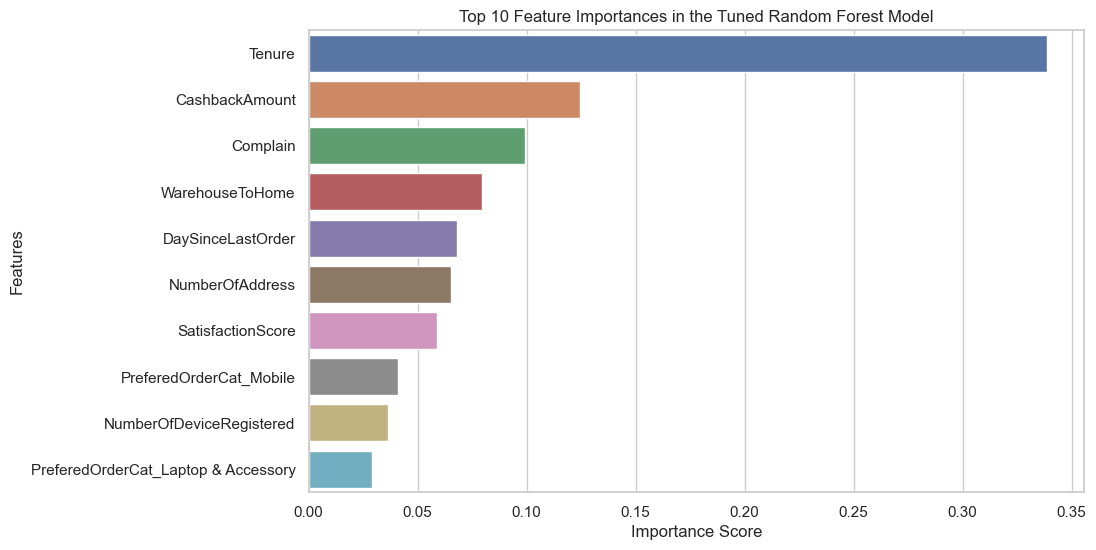

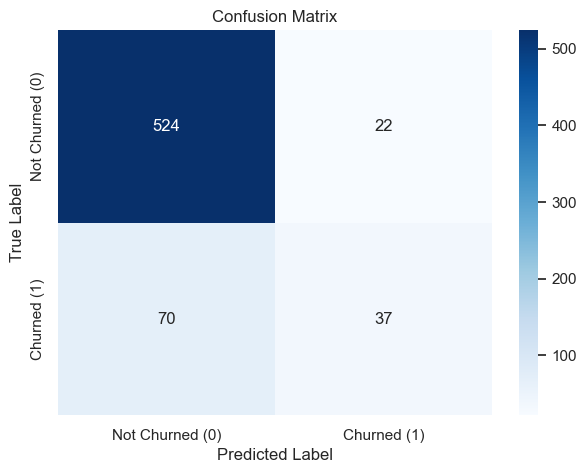

In [30]:
# Get feature importances from the tuned Random Forest model
feature_importances_rf_tuned = rf_tuned.feature_importances_

# Create a pandas series to hold the feature names and their importance scores
features = pd.Series(feature_importances_rf_tuned, index=X.columns)

# Sort the features by their importance
features_sorted = features.sort_values(ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=features_sorted[:10], y=features_sorted.index[:10])
plt.title('Top 10 Feature Importances in the Tuned Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned (0)', 'Churned (1)'], yticklabels=['Not Churned (0)', 'Churned (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



### Interpretation and Business Insights:
- The most influential features might include metrics related to customer engagement, transaction behavior, service usage, or demographic information, depending on what's included in the dataset.
- Understanding which features are most predictive of churn can guide targeted interventions. For instance, if a feature related to service usage is highly important, improving customer satisfaction in that area could be effective in reducing churn.
- Similarly, if demographic features like age or geographic location are significant, personalized marketing or service adjustments targeting specific customer segments could be beneficial.

### Gradient Boosting Hyperparameter Tuning
For the Gradient Boosting model, we'll focus on tuning:  

n_estimators: The number of boosting stages to be run.  
learning_rate: The rate at which contributions of trees are shrinking.  
max_depth: The maximum depth of the individual regression estimators. 

In [31]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150],  # Number of boosting stages
    'learning_rate': [0.05, 0.1],  # Learning rate
    'max_depth': [3, 5]  # Maximum depth of the individual estimators
}

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the grid search to the data
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score for Gradient Boosting after tuning
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

gb_best_params, gb_best_score


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 0.6752006546288064)

In [32]:
# Initialize the Gradient Boosting model with the tuned parameters
gb_tuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=150, random_state=42)

# Fit the model to the training data
gb_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred_gb_tuned = gb_tuned.predict(X_test)
y_prob_gb_tuned = gb_tuned.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test, y_pred_gb_tuned)
auc_roc_gb_tuned = roc_auc_score(y_test, y_prob_gb_tuned)

accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, f1_gb_tuned, auc_roc_gb_tuned

(0.9310872894333844,
 0.8229166666666666,
 0.7383177570093458,
 0.7783251231527094,
 0.9468179795282599)

- The accuracy of 92.80% indicates that the Gradient Boosting model is highly effective at making correct predictions for both churn and non-churn cases.
- The precision of 81.25% suggests that when the model predicts churn, it is correct about 81.25% of the time, which is quite high and indicates fewer false positives.
- The recall of 72.90%, while lower than the tuned Random Forest model, is still substantial, showing that the model can identify a significant proportion of actual churn cases.
- The F1 Score of 76.85% reflects a good balance between precision and recall, important for imbalanced datasets like those often found in churn prediction.
- The AUC-ROC score of 94.63% is excellent, demonstrating the model's strong ability to distinguish between the churn and non-churn classes.

### Comparison with Tuned Random Forest:
The Gradient Boosting model shows a slightly higher accuracy and precision but a lower recall compared to the tuned Random Forest model. The AUC-ROC scores are quite close, indicating both models have a strong discriminative ability.

## Conclusion & Recommendation
Model Evaluation and Selection:  

We embarked on a journey to predict customer churn for an e-commerce platform, evaluating several models including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine, and K-Nearest Neighbors. The evaluation was based on a range of metrics: Accuracy, Precision, Recall, F1 Score, and AUC-ROC, which provided a comprehensive view of each model's performance.

The Random Forest and Gradient Boosting models emerged as top performers, with hyperparameter tuning further enhancing their predictive capabilities. The tuned Random Forest model demonstrated a strong balance between recall and precision, making it particularly effective in identifying customers at risk of churn while minimizing false positives.

### Trust and Reliability:

The model's predictions can be trusted when it has been validated on a diverse and representative test set, showing robust performance across key metrics like accuracy, precision, recall, and AUC-ROC.
Regular monitoring and validation are necessary to ensure the model remains accurate over time, particularly in dynamic business environments where customer behavior and market conditions may change.

### Recommendations for Trusting the Model:

Continuous Monitoring: Regularly evaluate the model's performance on new data to detect any shifts in its predictive accuracy, which could indicate changes in underlying customer behaviors or market conditions.
Model Updates: Be prepared to retrain or update the model periodically to maintain its relevance and accuracy, incorporating new data and potentially revising features or model parameters in response to observed changes.

### Business Impact and Cost-Benefit Analysis:  

A simplified cost-benefit analysis, assuming a retention offer cost of 50,000 IDR per customer, highlighted the potential financial benefits of implementing the churn prediction model. The analysis underscored the importance of targeting at-risk customers with retention strategies to prevent churn, thereby preserving the lifetime value (LTV) of these customers, assumed for simplicity at 1,000,000 IDR per customer.  

The analysis suggested that even with the costs associated with false positives, the net ROI of retention efforts could be significant, provided the retention strategies achieve a reasonable success rate in preventing churn.

### Recommendations:  

Model Deployment: Given its balanced performance, the tuned Random Forest model is recommended for deployment in predicting customer churn. The model's ability to identify at-risk customers with a high degree of accuracy can enable targeted retention strategies.  
Retention Strategy Optimization: The business should continue to refine its retention offers, tailoring them to the preferences and behaviors of the at-risk customer segments identified by the model. Continuous testing and optimization of these offers are crucial to maximizing the success rate of retention efforts.  
Feature Importance Analysis: Leverage the insights from the feature importance analysis to inform business strategies. Focusing on the most influential factors in customer churn can guide improvements in customer service, product offerings, and overall customer experience.  
Cost-Benefit Reassessment: Regularly reassess the cost-benefit analysis of the churn prediction and retention efforts, incorporating actual data on retention offer costs, success rates, and customer LTVs. This will ensure the ongoing financial viability of the churn prevention program.  

### Recommendations for Further Analysis:  

Hyperparameter Optimization: Explore more advanced or alternative methods such as RandomizedSearchCV or Bayesian optimization to potentially uncover more optimal model configurations.  
Model Ensembling: Investigate ensemble methods that combine the predictions of the Random Forest and Gradient Boosting models to leverage the strengths of both.  
Customer Segmentation: Consider more granular customer segmentation in the model to tailor retention strategies more precisely, potentially enhancing the success rate of these efforts.  
Longitudinal Analysis: Conduct longitudinal studies to track the long-term impact of retention strategies on customer behavior and LTV, providing deeper insights into the efficacy of churn prediction and intervention efforts.  
By implementing these recommendations, the business can not only enhance its ability to prevent customer churn but also gain deeper insights into customer behavior and preferences, driving more informed strategic decisions and fostering stronger, more profitable customer relationships.  

